In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
import pymysql
 

In [ ]:
#set the fonts that are on the box so as to stop the warning messages
# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

In [35]:
tripData1 = pd.read_csv('/dltraining/datasets/Trip Data/trip_data_1.csv', nrows = 50000)

In [3]:
tripData1.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [36]:
tripFare1 = pd.read_csv('/dltraining/datasets/Trip Fare/trip_fare_1.csv', nrows = 50000) 

#remove the leading spaces
tripFare1.columns = ['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount']

In [5]:
tripFare1.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [6]:
pandas_profiling.ProfileReport(tripFare1)

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling bac

Number of variables,11
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,859.5 KiB
Average record size in memory,88.0 B
Numeric,4
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [7]:
pandas_profiling.ProfileReport(tripData1)

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,14
Number of observations,10000
Total Missing (%),7.0%
Total size in memory,1.1 MiB
Average record size in memory,112.0 B
Numeric,7
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1


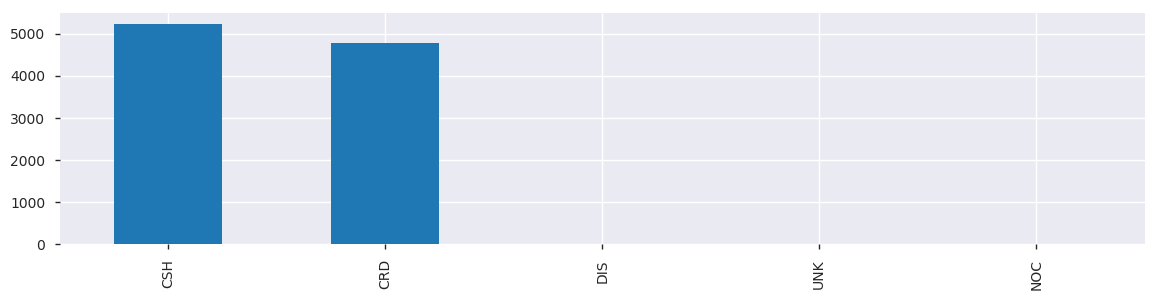

In [8]:
tripFare1.payment_type.value_counts().plot(kind='bar', figsize=(14,3))

In [9]:
tripFare1[tripFare1.fare_amount<0]

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount


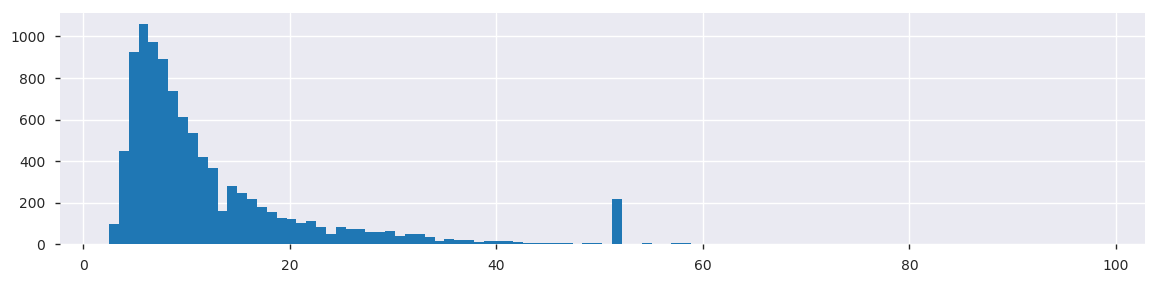

In [10]:
tripFare1[tripFare1.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))

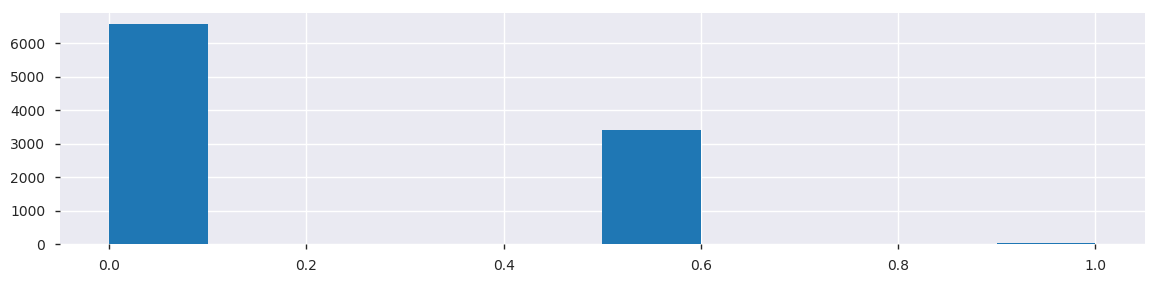

In [11]:
tripFare1.surcharge.hist(figsize=(14,3))

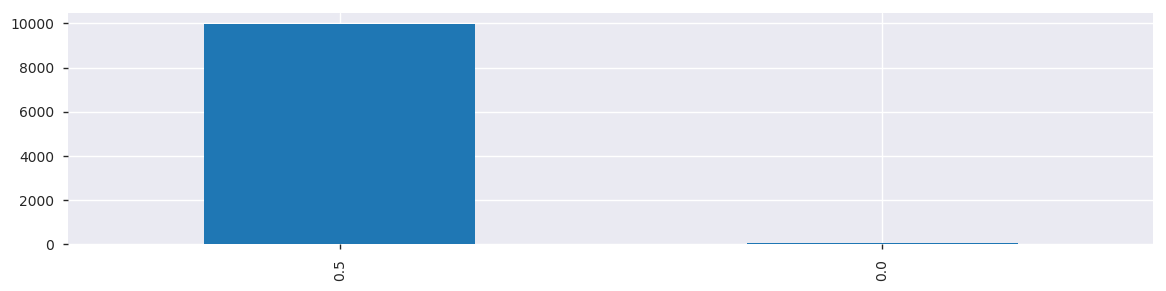

In [12]:
tripFare1.mta_tax.value_counts().plot(kind='bar', figsize=(14,3))

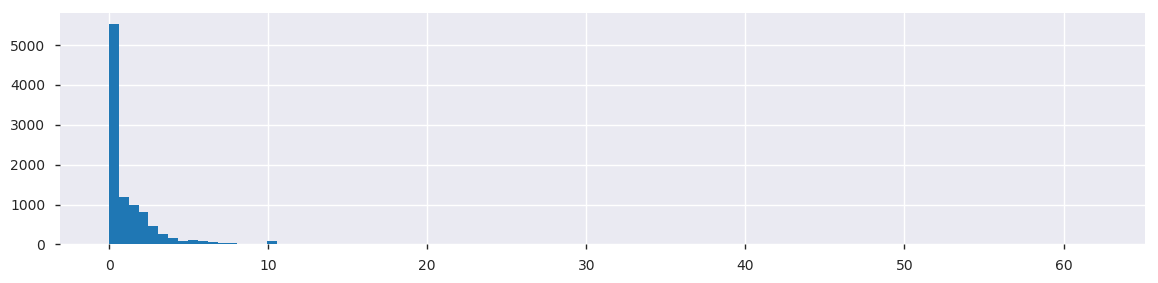

In [13]:
tripFare1.tip_amount.hist(bins=100, figsize=(14,3))

0.00     9531
1.80        3
2.20        4
4.80      427
6.50        1
9.60        5
10.25      20
12.00       1
13.00       1
13.25       2
14.40       2
14.65       1
15.05       1
15.25       1
Name: tolls_amount, dtype: int64


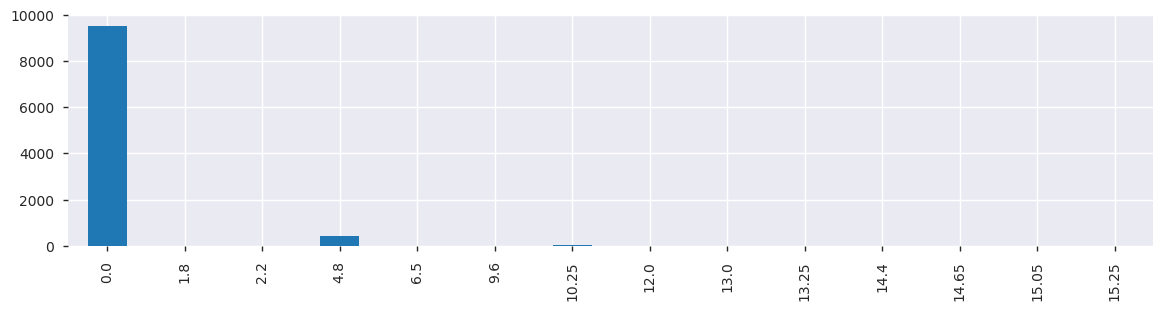

In [14]:
print(tripFare1.tolls_amount.value_counts().sort_index())
tripFare1.tolls_amount.value_counts().sort_index().plot(kind='bar', figsize=(14,3))

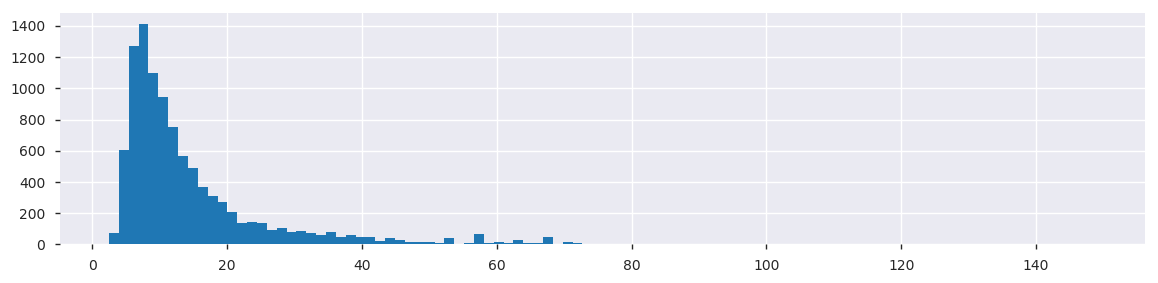

In [15]:
tripFare1.total_amount.hist(bins=100, figsize=(14,3))

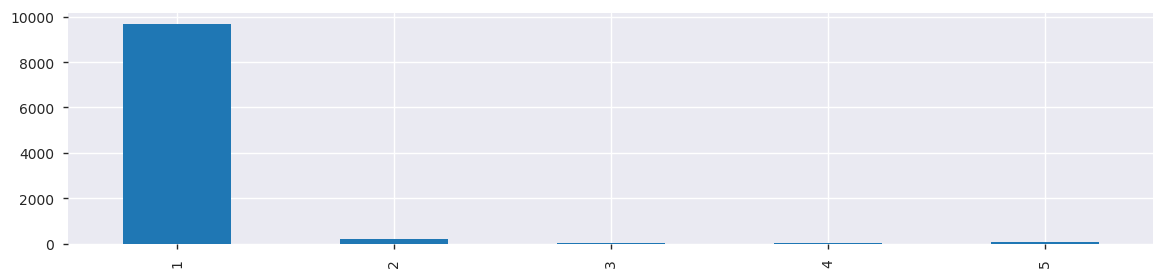

In [16]:
tripData1.rate_code.value_counts().sort_index().plot(kind='bar', figsize=(14,3))

In [17]:
tripData1.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

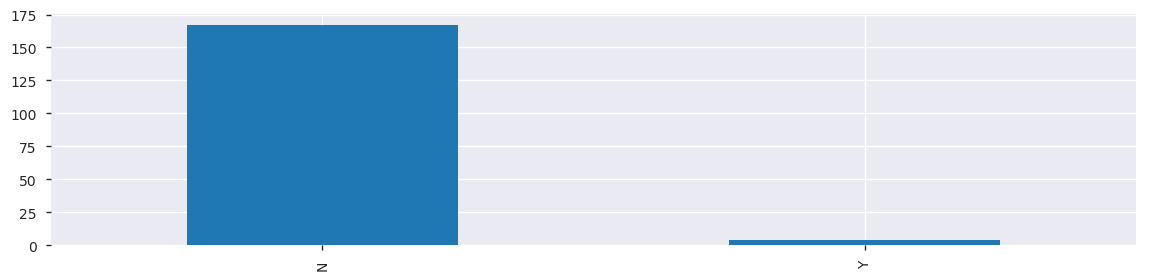

In [18]:
tripData1.store_and_fwd_flag.value_counts().sort_index().plot(kind='bar', figsize=(14,3))

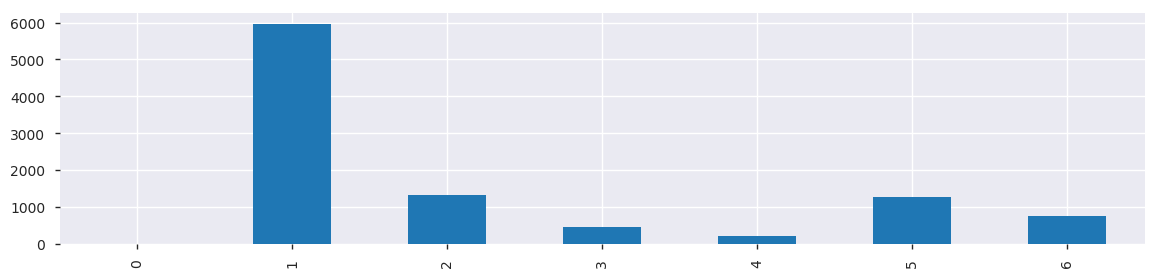

In [19]:
tripData1.passenger_count.value_counts().sort_index().plot(kind='bar', figsize=(14,3))

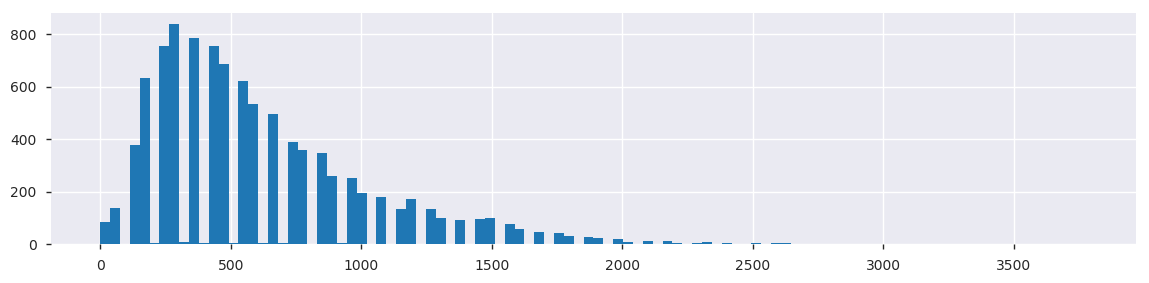

In [20]:
tripData1.trip_time_in_secs.hist(bins=100, figsize=(14,3))

# Dropping null data

In [23]:
tripData1

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.00,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.50,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.10,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.70,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.10,-73.976250,40.748528,-74.002586,40.747868
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,1.70,-73.966743,40.764252,-73.983322,40.743763
6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,N,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,0.80,-73.995804,40.743977,-74.007416,40.744343
7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,N,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,10.70,-73.989937,40.756775,-73.865250,40.770630
8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,N,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,0.80,-73.980072,40.743137,-73.982712,40.735336
9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,N,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,2.50,-73.977936,40.786983,-73.952919,40.806370


stop
print('Old size: %d' % len(tripData1))
tripData1 = tripData1.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(tripData1))

# Boundaries of New York (Lat/Long)
<ul>
  <li>40.706041, -73.927436 - Centre of New York</li>
  <li>41.411137, -74.997657 - Top Left</li>
  <li>40.027137, -74.893068 - Bottom Left</li>
  <li>41.937288, -71.428648 - Top Right</li>
  <li>39.905568, -71.365129 - Bottom Right</li>
</ul>

## Determine range of values should fall between
<ul>
  <li>39.900000 to 42.000000 - Lat Range</li>
  <li>-71.000000 to -75.000000 - Long Range</li>
</ul>


In [59]:
#Drop rows with long / lat data that is either in correct or out of range that we are interested in
print('Old size: %d' % len(tripData1))
tripData1 = tripData1[((tripData1.pickup_longitude<=-71.000000) & (tripData1.pickup_longitude>=-75.000000)) &\
                      ((tripData1.pickup_latitude>=39.900000) & (tripData1.pickup_latitude<=42.000000)) &\
                      ((tripData1.dropoff_longitude<=-71.000000) & (tripData1.dropoff_longitude>=-75.000000)) &\
                      ((tripData1.dropoff_latitude>=39.900000) & (tripData1.dropoff_latitude<=42.000000))]

print('New size: %d' % len(tripData1))

Old size: 49101
New size: 48980


## Verify the range of the data

In [63]:
# minimum and maximum longitude
min(tripData1.pickup_longitude.min(), tripData1.dropoff_longitude.min()), \
max(tripData1.pickup_longitude.max(), tripData1.dropoff_longitude.max())

(-74.51666999999999, -73.434303)

In [61]:
# minimum and maximum latitudemin(tripData1.pickup_latitude.min(), tripData1.dropoff_latitude.min()), \
max(tripData1.pickup_latitude.max(), tripData1.dropoff_latitude.max())

(40.518768, 41.349998)

# Maps

In [64]:
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [65]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

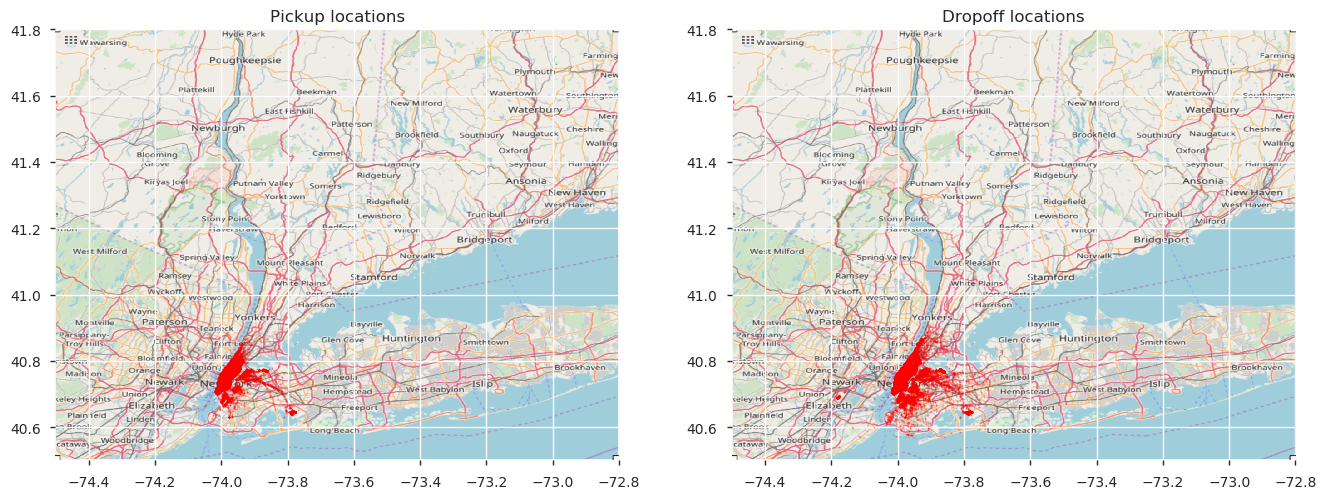

In [79]:
# plot training data on map
plot_on_map(tripData1, BB, nyc_map, s=1, alpha=0.3)

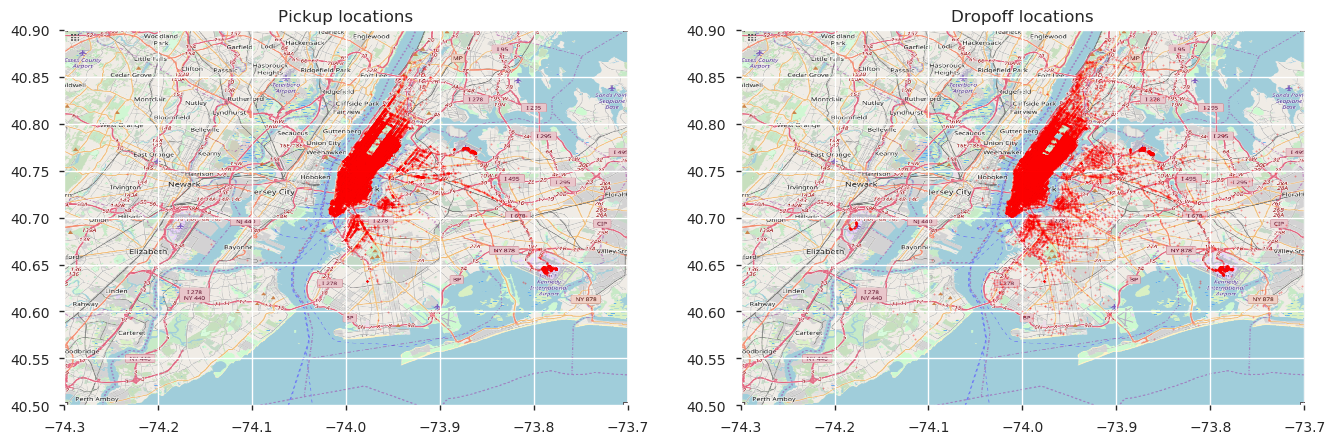

In [67]:
# plot training data on map zoomed in
plot_on_map(tripData1, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

In [76]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [74]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

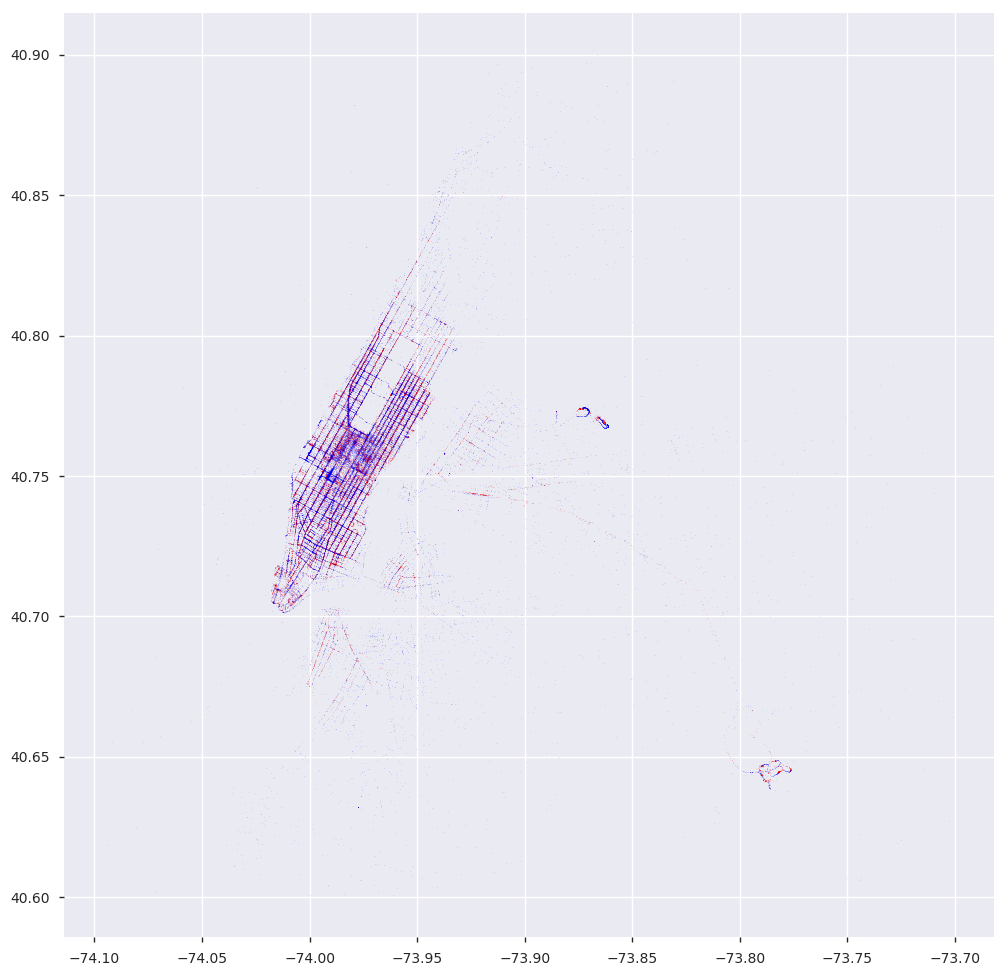

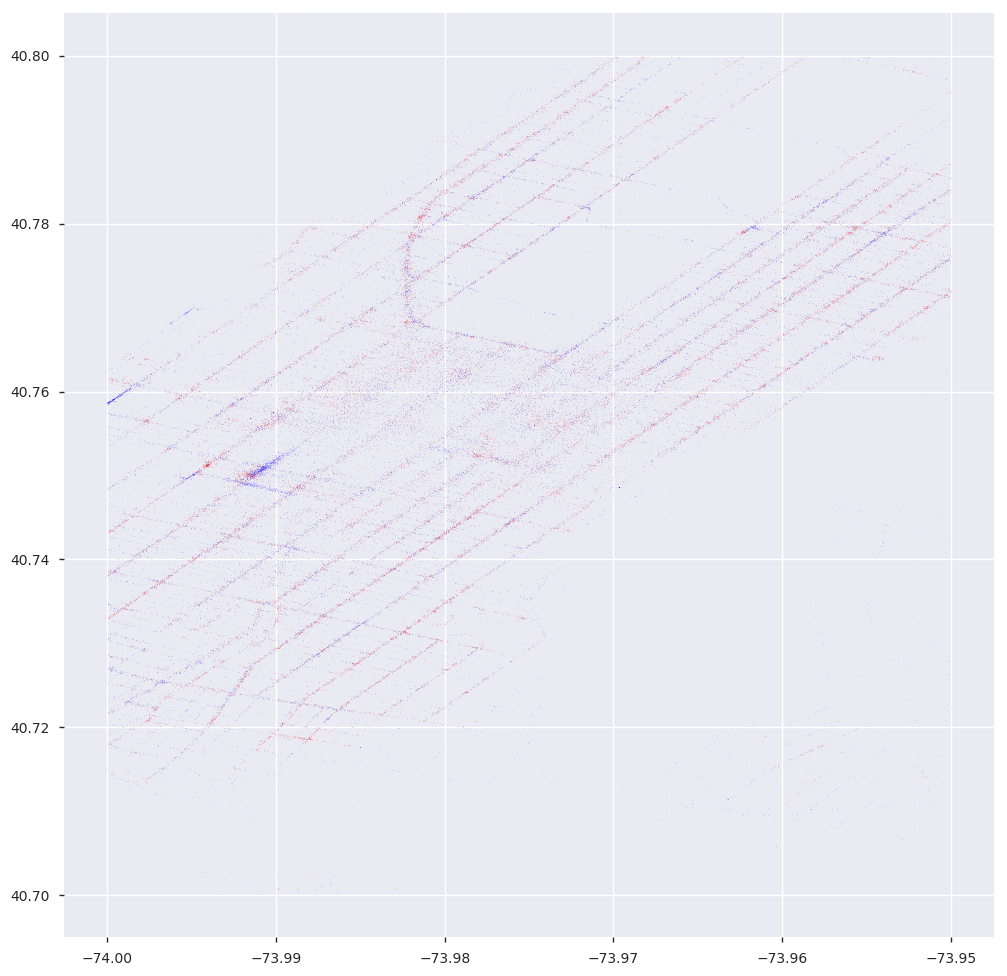

In [77]:
plot_hires(tripData1, (-74.1, -73.7, 40.6, 40.9))
plot_hires(tripData1, (-74, -73.95, 40.7, 40.8))

In [73]:
matplotlib.font_manager.get_cachedir()

'/home/ec2-user/.cache/matplotlib'

In [68]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-Oblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed-BoldItalic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-BoldOblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-BoldOblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif-Italic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif-BoldItalic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed-Italic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-Oblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-Bold.ttf']